In [34]:
import pandas as pd

In [35]:
semisupervised_train=pd.read_csv("semisupervised_train.csv")
print("semisupervised_train>>")
semisupervised_train

semisupervised_train>>


,id,cuisine,review_count,rating,recommend
0,3quopZyL8WuqVFfsCi0z2A,indian,98,4.5,1
1,byVmQiGVTyLrG_74OFJ7eg,italian,98,4.0,1
2,X9ftU-exKhTMOjtr3B52rw,chinese,98,4.0,1
3,D9Uf7UmU2KlgS_H8lJwOrA,mexican,98,4.0,1
4,sr0rCMn-XtKATvl9adYQxA,chinese,98,3.5,1
...,...,...,...,...,...
2894,ThderRLd1vYtTFO7LNnP4g,greek,1,5.0,0
2895,CB-2K_Xc0m0DICXxl7evow,latin,1,5.0,0
2896,2s2MwMl7D_khTTKKdMnrgQ,latin,1,5.0,0
2897,d6iU2zIWJOCLUAYXjQLXLA,latin,1,5.0,0


In [36]:
semisupervised_train.describe()

,review_count,rating,recommend
count,2899.000000,2899.000000,2899.000000
mean,84.957227,3.700931,0.238703
std,128.393346,0.535235,0.426364
min,1.000000,2.500000,0.000000
25%,11.000000,3.500000,0.000000
50%,36.000000,3.500000,0.000000
75%,113.000000,4.000000,0.000000
max,1613.000000,5.000000,1.000000


In [37]:
unsupervised_train=pd.read_csv("unsupervised_train.csv")
print("unsupervised_train>>")
unsupervised_train

unsupervised_train>>


,id,cuisine,review_count,rating,recommend
0,p1ohbPwI1QfjHQ2zRup5OA,italian,76,4.0,1
1,uXzHDmzG5mTcjP7IctinKQ,indian,76,4.0,1
2,ceK2VvPlxPBPo1evXOlD7g,indian,76,4.0,1
3,LnsAgGlvIPmc9eV_cMdU5w,mexican,76,4.0,1
4,98NaJ8FWzPuoymHfj6IIeA,chinese,76,3.5,1
...,...,...,...,...,...
1097,p-95dBWK8sxiCvJrUNxZ3Q,chinese,2,2.5,0
1098,EnW3yR9O3yGrjQ9eXEpWFQ,chinese,2,2.5,0
1099,QSYoMQZTkDT8MhoJTQFQdg,chinese,2,2.5,0
1100,b1OAb3zbmNnMAG9xqtttfg,chinese,2,2.5,0


In [38]:
unsupervised_train.describe()

,review_count,rating,recommend
count,1102.000000,1102.000000,1102.000000
mean,72.245009,2.962341,0.500000
std,63.091170,0.945224,0.500227
min,0.000000,0.000000,0.000000
25%,7.000000,2.500000,0.000000
50%,79.000000,3.000000,0.500000
75%,119.000000,4.000000,1.000000
max,303.000000,5.000000,1.000000


In [39]:
semisupervised_train_for_model=semisupervised_train.drop(['id', 'cuisine'], axis=1)
semisupervised_train_for_model

,review_count,rating,recommend
0,98,4.5,1
1,98,4.0,1
2,98,4.0,1
3,98,4.0,1
4,98,3.5,1
...,...,...,...
2894,1,5.0,0
2895,1,5.0,0
2896,1,5.0,0
2897,1,5.0,0


In [18]:
features_cols=[ 'review_count', 'rating']

In [19]:
x = semisupervised_train_for_model[features_cols] # Features
y = semisupervised_train.recommend

In [20]:
import sklearn

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

1.0

In [25]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[446,   0],
       [  0, 134]], dtype=int64)

In [41]:
y_pred = model.predict(unsupervised_train[features_cols])
predictions = [round(value) for value in y_pred]
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(unsupervised_train.recommend, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.74%


In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

Recommend: ROC AUC=0.500
Non Recommend: ROC AUC=1.000


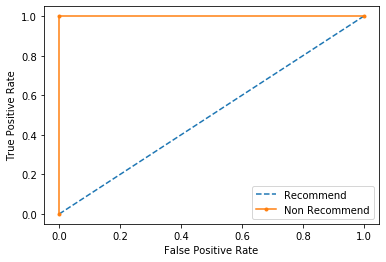

In [30]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Recommend: ROC AUC=%.3f' % (ns_auc))
print('Non Recommend: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Recommend')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Non Recommend')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()